In [24]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Спецификация каждого пути

In [25]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# Установка классификационного номера

In [26]:
NUM_CLASSES = 10

# Длина входного сигнала

In [27]:
TIME_STEPS = 16
DIMENSION = 2

# Считывание обучающих данных

In [28]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [29]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Построение модели

In [31]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [32]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                250       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,152
Trainable params: 1,152
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Обратные вызовы контрольных точек модели
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Обратные вызовы для досрочного завершения
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [34]:
# Компиляция моделей
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели

In [35]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
31/34 [==========================>...] - ETA: 0s - loss: 2.2452 - accuracy: 0.2485 
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
34/34 [==============================] - 1s 9ms/step - loss: 2.2412 - accuracy: 0.2524 - val_loss: 2.1687 - val_accuracy: 0.2444
Epoch 2/1000
24/34 [====================>.........] - ETA: 0s - loss: 2.1151 - accuracy: 0.2611
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 2.0847 - accuracy: 0.2702 - val_loss: 1.9675 - val_accuracy: 0.3743
Epoch 3/1000
29/34 [========================>.....] - ETA: 0s - loss: 1.8909 - accuracy: 0.2958
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 1.8805 - accuracy: 0.2985 - val_loss: 1.7428 - val_accuracy: 0.3559
Epoch 4/1000
32/34 [===========================>..] - ETA: 0s - lo

In [36]:
# Загрузка сохранённой модели
model = tf.keras.models.load_model(model_save_path)

In [37]:
# Тест на вывод
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 55ms/step
[9.5119512e-01 1.0812839e-02 7.2496971e-03 1.7979383e-02 1.2761183e-02
 2.6480544e-07 3.3405021e-07 3.4781141e-07 4.5324498e-07 3.7561929e-07]
0


# Матрица путаницы

45/45 [==============================] - 0s 821us/step


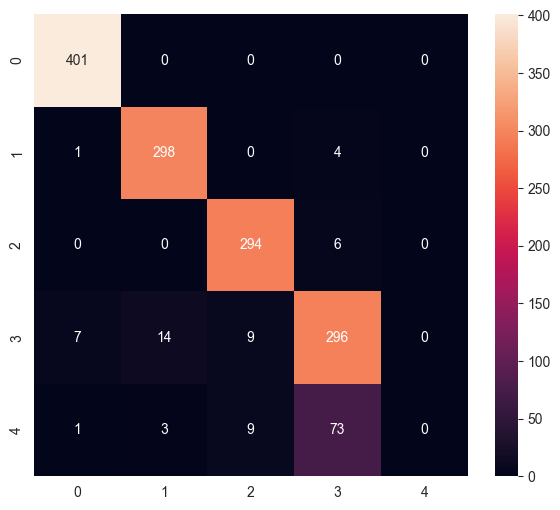

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       401
           1       0.95      0.98      0.96       303
           2       0.94      0.98      0.96       300
           3       0.78      0.91      0.84       326
           4       0.00      0.00      0.00        86

    accuracy                           0.91      1416
   macro avg       0.73      0.77      0.75      1416
weighted avg       0.86      0.91      0.88      1416



D:\Games\tracking\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Games\tracking\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Games\tracking\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Преобразование в модель для Tensorflow-Lite

In [39]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [40]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [41]:
# Преобразование (квантование) модели
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\sasha\AppData\Local\Temp\tmpd5ijnxks\assets


INFO:tensorflow:Assets written to: C:\Users\sasha\AppData\Local\Temp\tmpd5ijnxks\assets


6668

# Тест на вывод

In [42]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [43]:
# Получение тензор ввода/вывода
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [44]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [45]:
%%time
# реализация вывода
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [46]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5119512e-01 1.0812829e-02 7.2496939e-03 1.7979374e-02 1.2761176e-02
 2.6480566e-07 3.3404993e-07 3.4781141e-07 4.5324498e-07 3.7561890e-07]
0
